In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv('dataset.csv')

In [133]:
df

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62
...,...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,Rosemary,8261.63,1.00,754.98
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,Acacia,6939.39,1.00,543.41
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,Chestnut,4139.79,0.64,615.46
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,Avocado,4417.74,0.97,949.32


In [134]:
df.isnull().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

In [135]:
df.duplicated().sum()

0

In [136]:
df.rename(columns= {'CS': "Color Score", 'WC': "Water Content",  'EC': "Electrical Conductivity", 'F':"Fructose Level", 
                    'G': "Glucose Level", "Pollen_analysis":'Pollen Analysis',},inplace=True)

In [137]:
df.describe()

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Viscosity,Purity,Price
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471,594.807644
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417,233.627972
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000,128.720000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000,433.000000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000,612.960000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000,770.220000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000,976.690000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Color Score              247903 non-null  float64
 1   Density                  247903 non-null  float64
 2   Water Content            247903 non-null  float64
 3   pH                       247903 non-null  float64
 4   Electrical Conductivity  247903 non-null  float64
 5   Fructose Level           247903 non-null  float64
 6   Glucose Level            247903 non-null  float64
 7   Pollen Analysis          247903 non-null  object 
 8   Viscosity                247903 non-null  float64
 9   Purity                   247903 non-null  float64
 10  Price                    247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


In [139]:
numerical_variables = df.dtypes[df.dtypes == 'float64'].index
categorical_variables = df.dtypes[df.dtypes == 'object'].index

In [140]:
numerical_variables

Index(['Color Score', 'Density', 'Water Content', 'pH',
       'Electrical Conductivity', 'Fructose Level', 'Glucose Level',
       'Viscosity', 'Purity', 'Price'],
      dtype='object')

### EDA

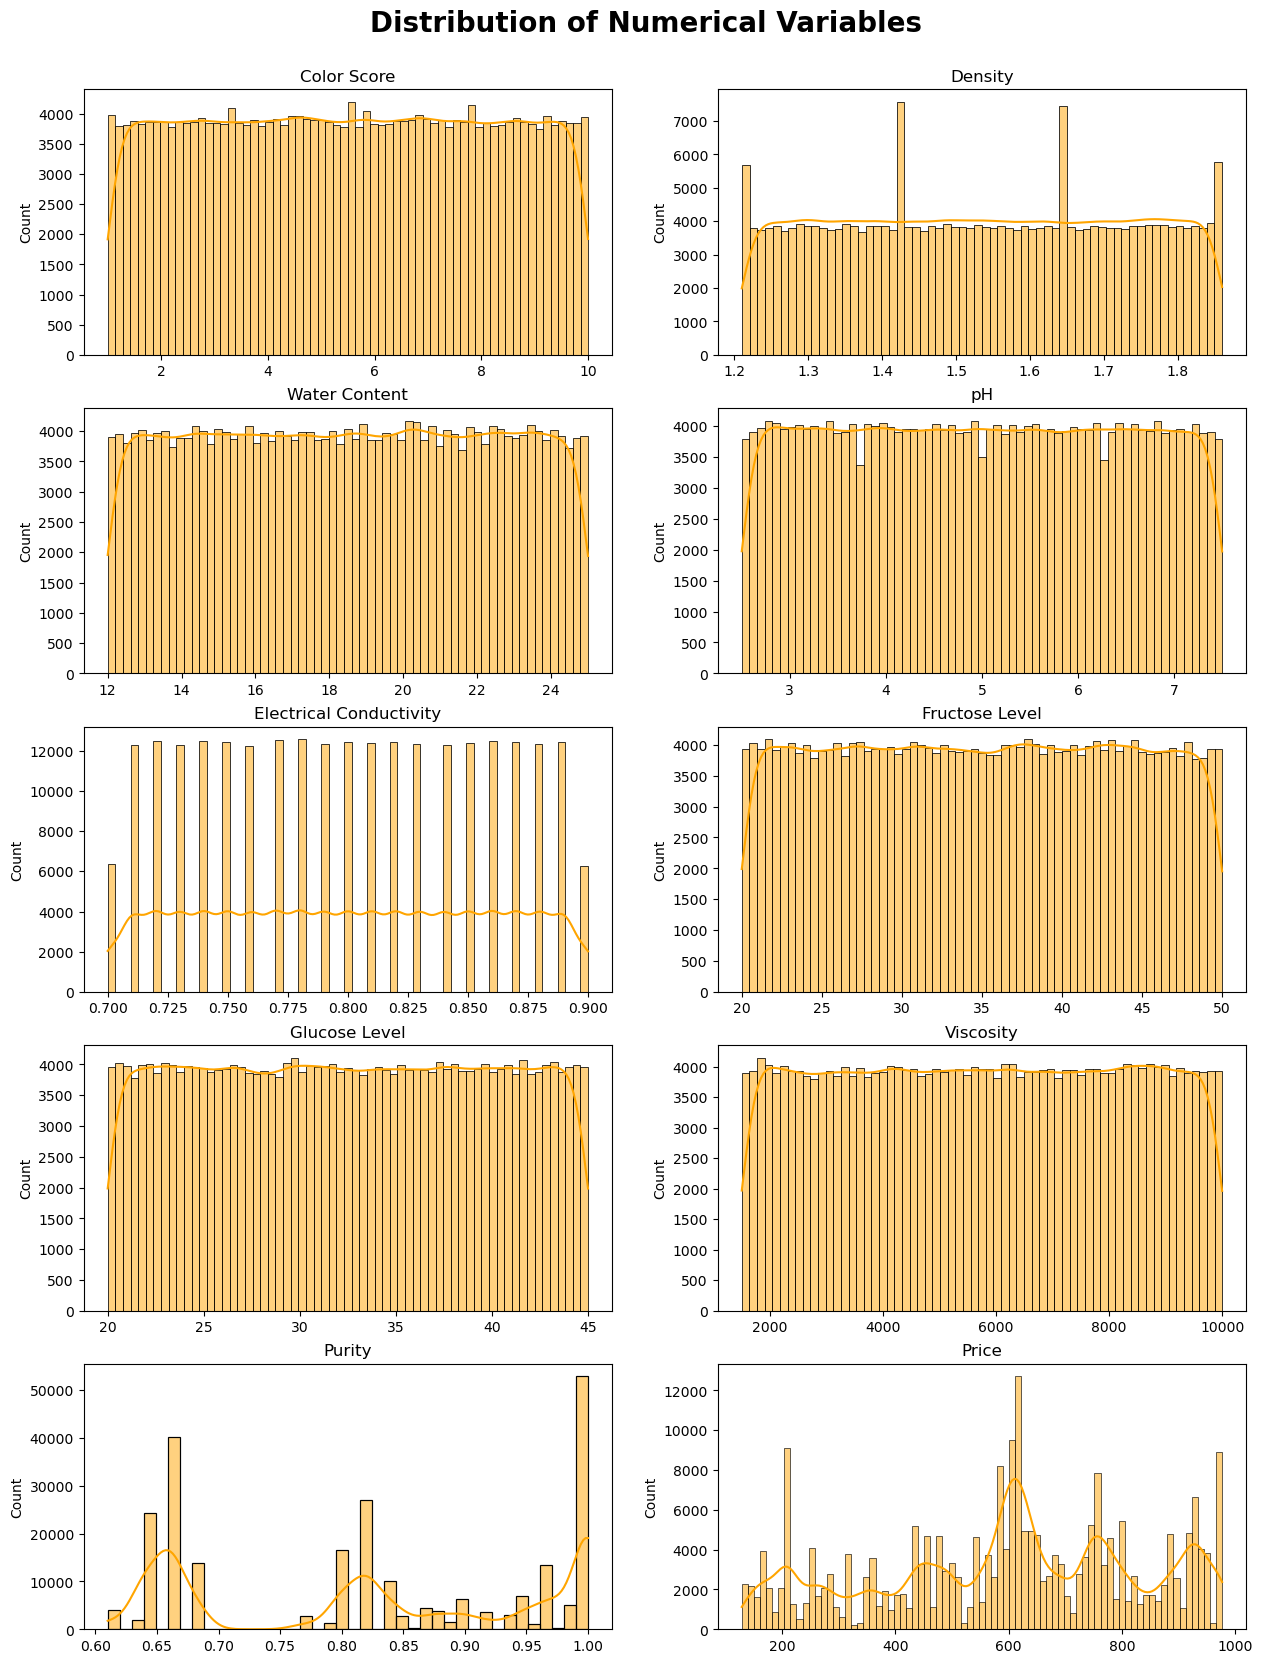

In [12]:
#Histogram

plt.figure(figsize = (15, 20))

index = 1
for variable in (numerical_variables):
    plt.subplot(5, 2, index)
    sns.histplot(x = df[variable], kde=True, color='Orange')
    plt.title(variable)
    index += 1
    plt.xlabel('')

plt.suptitle('Distribution of Numerical Variables', size=20, weight='bold', y=0.92)
plt.show()

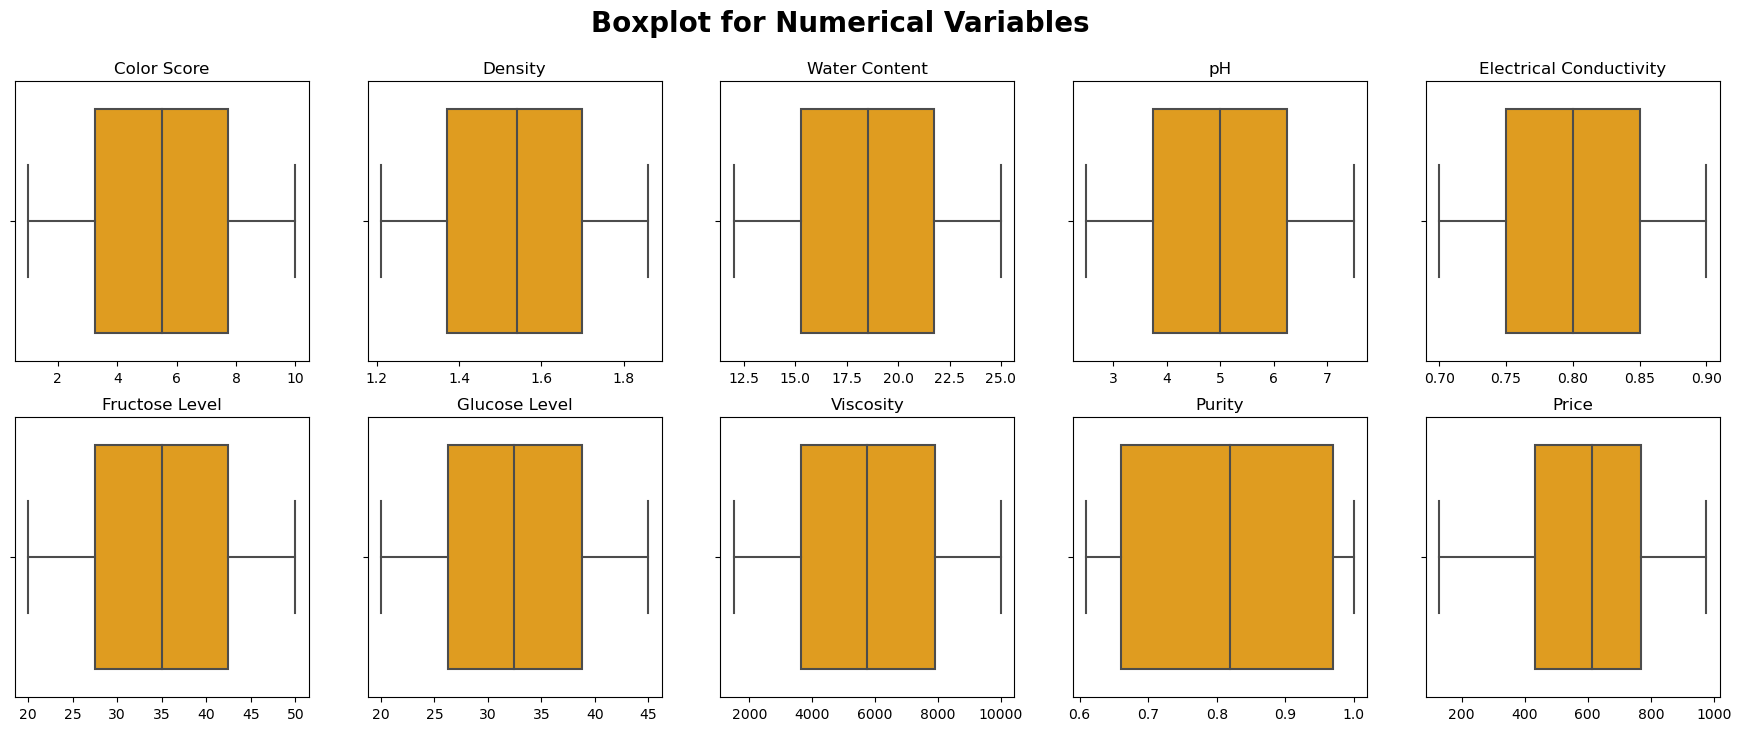

In [107]:
#Barplot

plt.figure(figsize = (22, 8))

index = 1
for  variable in (numerical_variables):
    plt.subplot(2, 5, index)
    sns.boxplot(x = df[variable], color='orange')
    plt.title(variable)
    index += 1
    plt.xlabel('')

plt.suptitle('Boxplot for Numerical Variables', size=20, weight='bold', y=0.97)
plt.show()

In [14]:
df['Pollen Analysis'].unique()

array(['Blueberry', 'Alfalfa', 'Chestnut', 'Borage', 'Sunflower',
       'Orange Blossom', 'Acacia', 'Tupelo', 'Clover', 'Wildflower',
       'Thyme', 'Sage', 'Avocado', 'Lavender', 'Eucalyptus', 'Buckwheat',
       'Rosemary', 'Heather', 'Manuka'], dtype=object)

In [15]:
for value in categorical_variables:
    print(df[value].value_counts())

Eucalyptus        13194
Avocado           13191
Heather           13187
Thyme             13156
Sunflower         13148
Sage              13117
Blueberry         13106
Lavender          13086
Alfalfa           13049
Buckwheat         13036
Chestnut          13020
Wildflower        13016
Manuka            13003
Borage            13000
Orange Blossom    12992
Acacia            12976
Rosemary          12930
Clover            12910
Tupelo            12786
Name: Pollen Analysis, dtype: int64


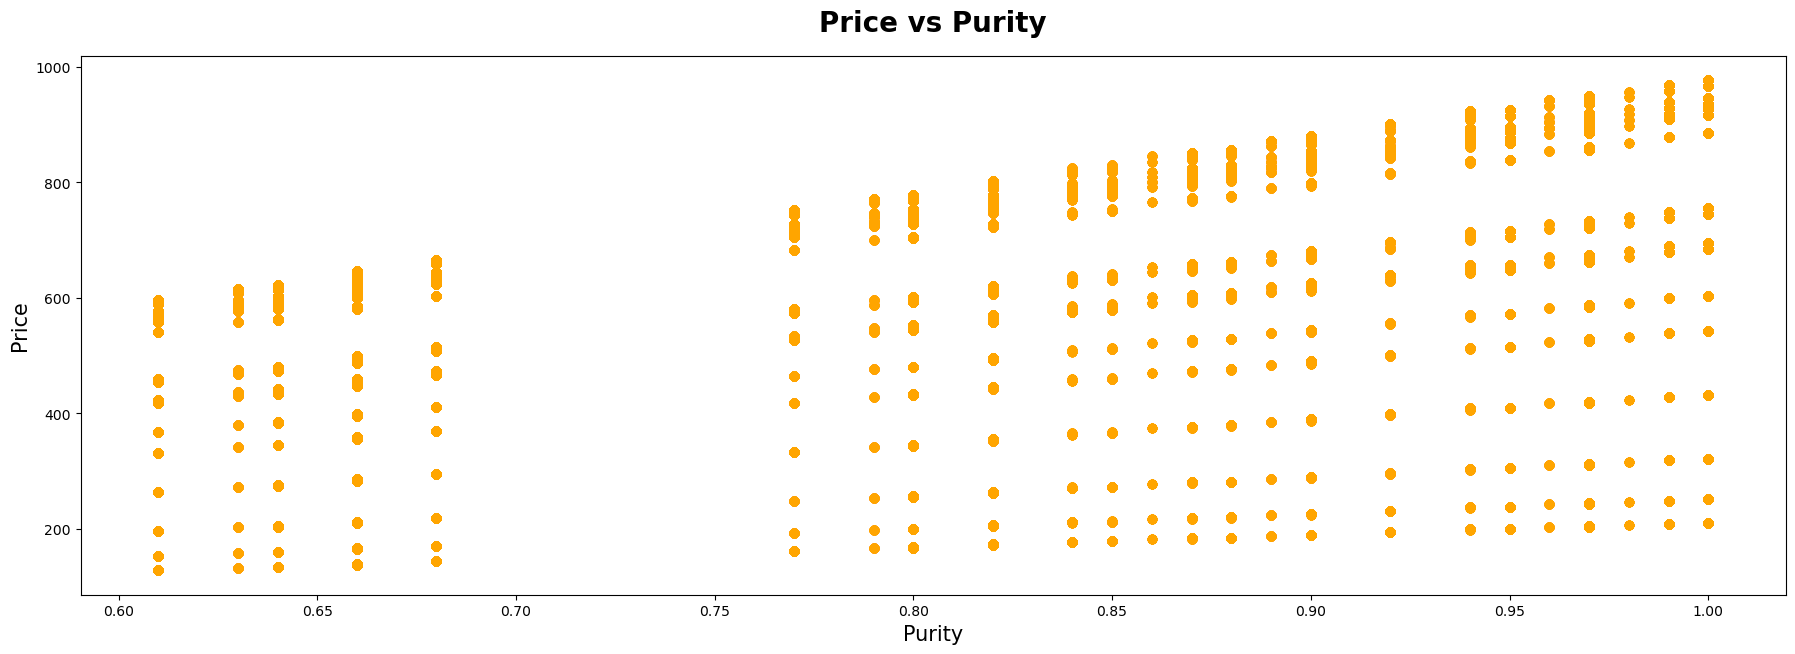

In [15]:
#Scatter plot

plt.figure(figsize=(22, 7))

plt.scatter(x = df['Purity'], y = df['Price'], color='orange')
plt.title('Price vs Purity', size=20, weight='bold', y=1.03)
plt.xlabel('Purity', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

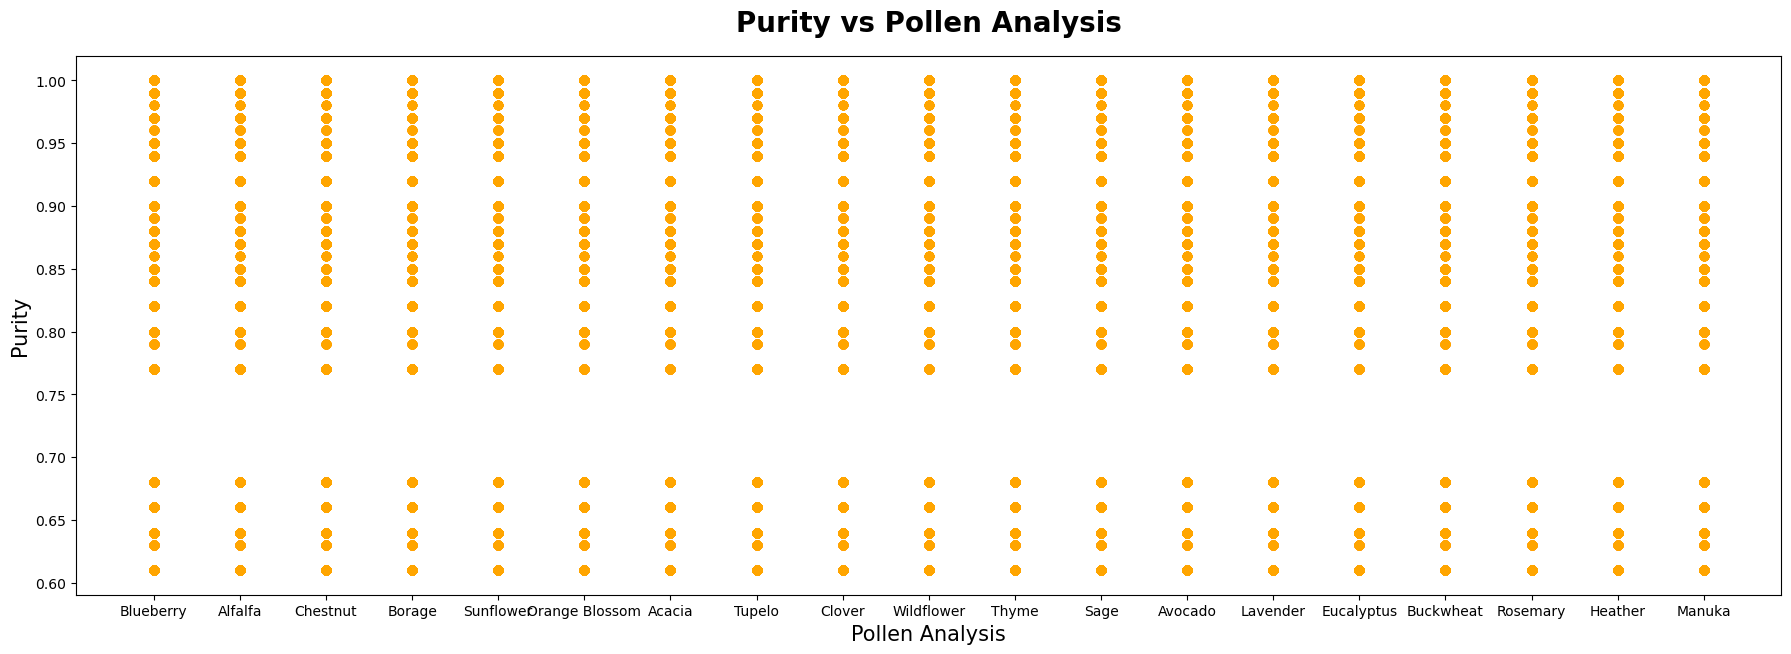

In [16]:
#Scatter plot

plt.figure(figsize=(22, 7))

plt.scatter(x = df['Pollen Analysis'], y = df['Purity'], color='orange')
plt.title('Purity vs Pollen Analysis', size=20, weight='bold', y=1.03)
plt.xlabel('Pollen Analysis', fontsize=15)
plt.ylabel('Purity', fontsize=15)
plt.show()

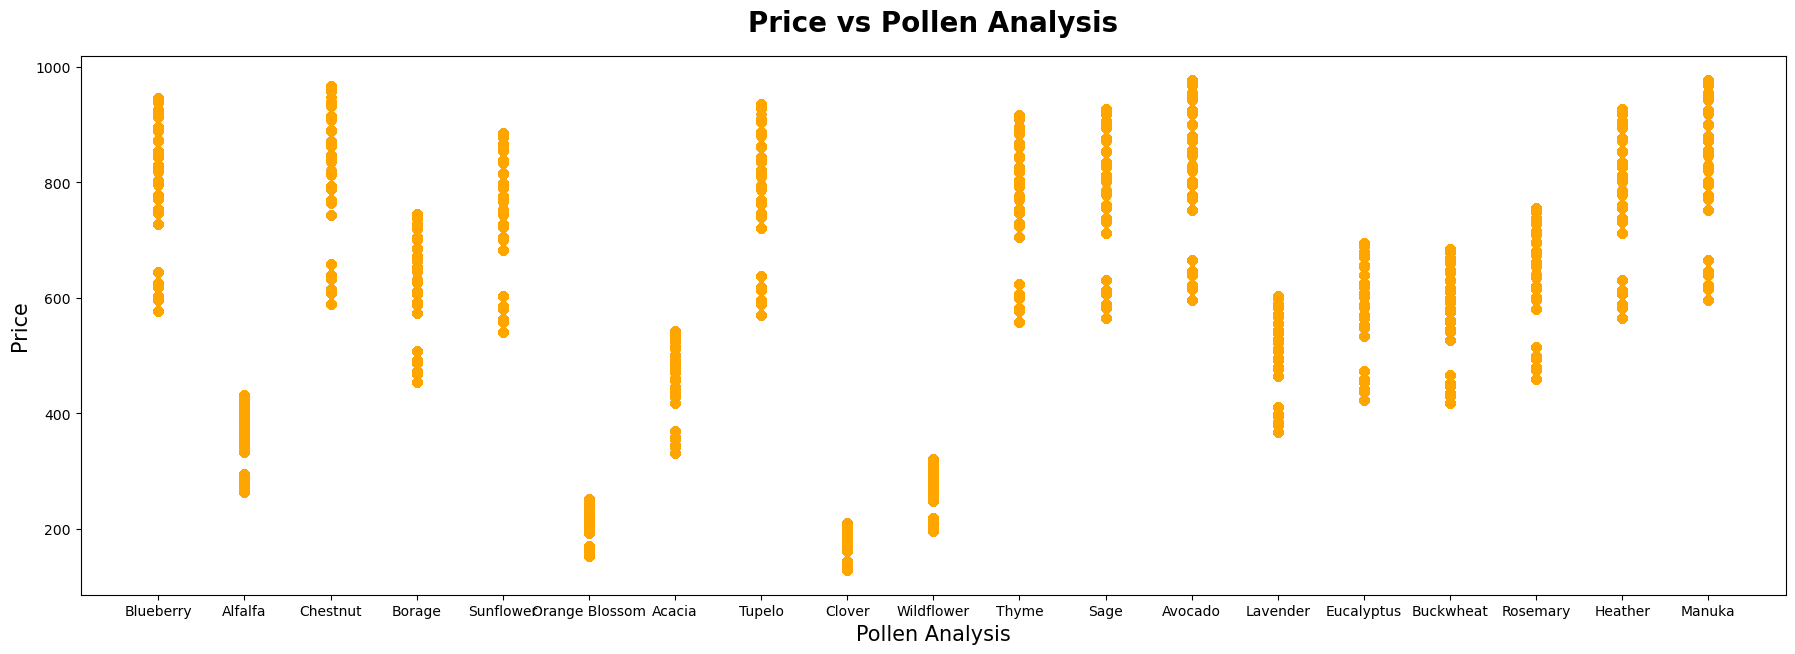

In [17]:
#Scatter plot

plt.figure(figsize=(22, 7))

plt.scatter(x = df['Pollen Analysis'], y = df['Price'], color='orange')
plt.title('Price vs Pollen Analysis', size=20, weight='bold', y=1.03)
plt.xlabel('Pollen Analysis', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

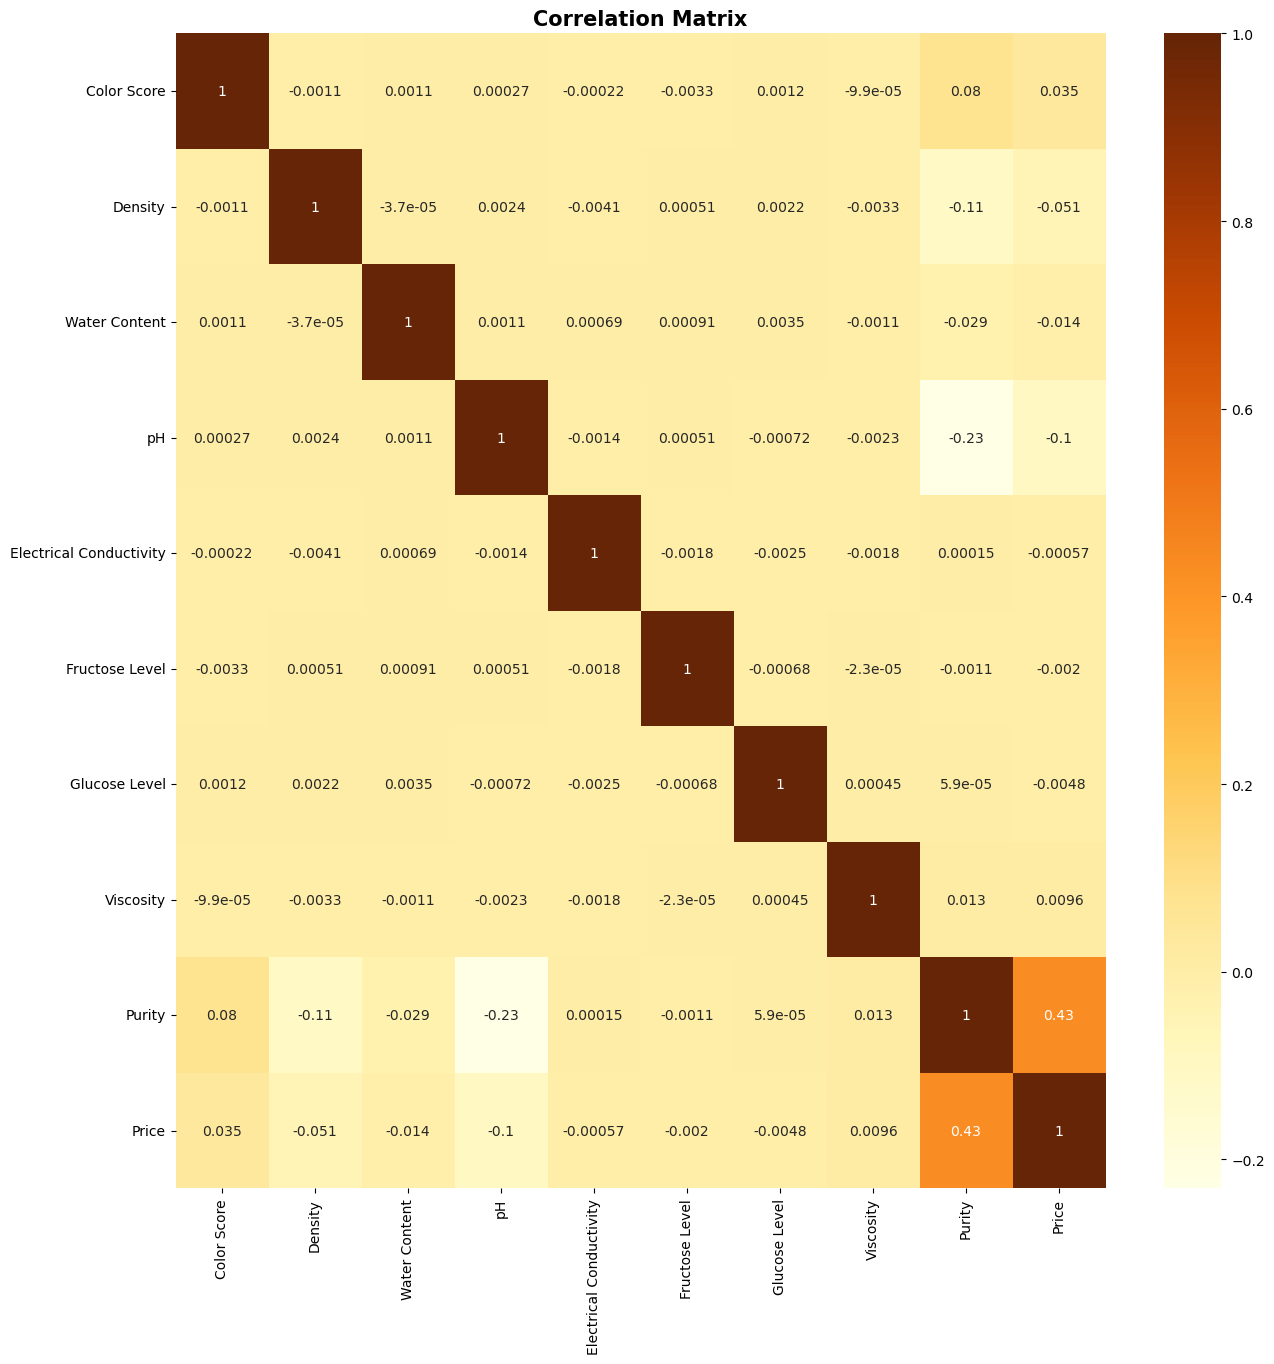

In [142]:
# Correlation matrix

plt.figure(figsize=(15, 15))

correlation_matrix = df[numerical_variables].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr')
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

In [143]:
correlation_score_purity = correlation_matrix['Purity'].sort_values(ascending=False)
correlation_score_price = correlation_matrix['Price'].sort_values(ascending=False)

print('Correlation score for Purity')
print('-'*35)
print(correlation_score_purity,'\n\n')

print('Correlation score for Price')
print('-'*35)
print(correlation_score_price)

Correlation score for Purity
-----------------------------------
Purity                     1.000000
Price                      0.432581
Color Score                0.079770
Viscosity                  0.012572
Electrical Conductivity    0.000151
Glucose Level              0.000059
Fructose Level            -0.001149
Water Content             -0.028894
Density                   -0.108834
pH                        -0.230855
Name: Purity, dtype: float64 


Correlation score for Price
-----------------------------------
Price                      1.000000
Purity                     0.432581
Color Score                0.035166
Viscosity                  0.009632
Electrical Conductivity   -0.000571
Fructose Level            -0.002041
Glucose Level             -0.004815
Water Content             -0.014381
Density                   -0.050518
pH                        -0.100714
Name: Price, dtype: float64


### Honey Price Prediction

In [113]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [114]:
# Function to preprocess data
def preprocess_data(df):
    # One hot Encoding
    one_hot_encoded_df = pd.get_dummies(df['Pollen Analysis'], prefix='Pollen_Analysis')
    df = pd.concat([df, one_hot_encoded_df], axis=1)
    df.drop('Pollen Analysis', axis=1, inplace=True)

    # Normalization
    scaler = MinMaxScaler()
    df[df.columns] = scaler.fit_transform(df[df.columns])
    return df

In [ ]:
# Function to cross-validate
def evaluate_model(model, name, X_train, y_train, X_test, y_test):
    print(f"Evaluating {name}...")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = [math.sqrt(-score) for score in scores]
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mae_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    
    # Training on the training set
    model.fit(X_train, y_train)
    # Predicting on the test set
    y_pred = model.predict(X_test)
    # Compute test set metrics
    test_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    
    print('')
    print('-'*25)
    print('Evaluation complete!')
    
    return [name, np.mean(rmse_scores), np.mean(r2_scores), np.mean(mae_scores), test_rmse, test_r2, test_mae]

In [3]:
df = preprocess_data(df)

X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = [
    ('Linear Regression', LinearRegression()),
    ('svr', SVR()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

results = []

for name, model in models:
    result = evaluate_model(model, name, X_train, y_train, X_test, y_test)
    results.append(result)

NameError: name 'preprocess_data' is not defined

In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'CV RMSE', 'CV R-squared', 'CV MAE', 'Test RMSE', 'Test R-squared', 'Test MAE'])
results_df

In [ ]:
# Function to perform model training and evaluation
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    return mse, r2, mae, rmse

In [ ]:
# Initialize models
linear_regression = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gradient_boost = GradientBoostingRegressor(random_state=42)
svr = SVR()
xgboost = XGBRegressor(random_state=42)

In [ ]:
# Models to be tuned
models = {
    'Linear Regression': (linear_regression, {}),
    'Random Forest': (random_forest, {'n_estimators': [100, 200, 300]}),
    'Gradient Boosting': (gradient_boost, {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2]}),
    'SVR': (svr, {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}),
    'XGBoost': (xgboost, {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2]})
}

In [ ]:
# Train and evaluate models
results = {}
for name, model in models:
    mse, r2, mae, rmse = train_evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MSE': mse, 'R-squared': r2, 'MAE': mae, 'RMSE': rmse}
    print(f"{name}: MSE = {mse:.4f}, R-squared = {r2:.4f}, MAE = {mae:.4f}, RMSE = {rmse:.4f}")

In [115]:
# Split the dataset into features (X) and target variable (y)
df = preprocess_data(df)
X = df.drop(['Price'], axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_rr = ridge_reg.predict(X_test)

lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
y_pred_lar = lasso_reg.predict(X_test)

In [117]:
# Random Forest
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [118]:
# Gradient Boosting
gradient_boost = GradientBoostingRegressor(random_state=42)
gradient_boost.fit(X_train, y_train)
y_pred_gb = gradient_boost.predict(X_test)

In [119]:
# SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [120]:
# XGBoost
xgboost = XGBRegressor(random_state=42)
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)

In [121]:
# Evaluate models
models = {
    'Linear Regression': (y_test, y_pred_lr),
    'Ridge Regression': (y_test, y_pred_rr),
    'Lasso Regression': (y_test, y_pred_lar),
    'Random Forest': (y_test, y_pred_rf),
    'SVR': (y_test, y_pred_svr),
    'XGBoost': (y_test, y_pred_xgb),
    'Gradient Boosting': (y_test, y_pred_gb)
}

In [122]:
results = {}
for name, (y_true, y_pred) in models.items():
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    results[name] = {'MSE': mse, 'R-squared': r2, 'MAE': mae, 'RMSE': rmse}

In [124]:
# Print results
print("\nResults:")
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.6f}, R-squared = {metrics['R-squared']:.6f}, MAE = {metrics['MAE']:.6f}, RMSE = {metrics['RMSE']:.6f}")


Results:
Linear Regression: MSE = 0.001743, R-squared = 0.976963, MAE = 0.030938, RMSE = 0.041754
Ridge Regression: MSE = 0.001743, R-squared = 0.976964, MAE = 0.030938, RMSE = 0.041754
Lasso Regression: MSE = 0.075684, R-squared = -0.000049, MAE = 0.224431, RMSE = 0.275107
SVR: MSE = 0.002055, R-squared = 0.972840, MAE = 0.038146, RMSE = 0.045337
XGBoost: MSE = 0.000000, R-squared = 0.999994, MAE = 0.000403, RMSE = 0.000649
Gradient Boosting: MSE = 0.000879, R-squared = 0.988379, MAE = 0.026474, RMSE = 0.029656


In [91]:
mse_svr = mean_squared_error(y_true, y_pred_svr)
r2_svr = r2_score(y_true, y_pred_svr)
mae_svr = mean_absolute_error(y_true, y_pred_svr)
rmse_svr = math.sqrt(mse)

In [95]:
r2_svr

0.9728404105907638

In [141]:
# Preprocess the data
df = preprocess_data(df)

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Price'], axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'svr': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"Evaluating {name}...")
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = [math.sqrt(-score) for score in scores]
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mae_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    
    results[name] = {
        'RMSE': rmse_scores, 
        'R-squared': r2_scores, 
        'MAE': mae_scores
    }

print('')
print('-'*25)
print('Evaluation complete!')

Evaluating Linear Regression...
Evaluating svr...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating XGBoost...

-------------------------
Evaluation complete!


In [146]:
# Print results
print("\nResults:")
for name, metrics in results.items():
    rmse_mean = np.mean(metrics['RMSE'])
    r2_mean = np.mean(metrics['R-squared'])
    mae_mean = np.mean(metrics['MAE'])

    print(f"{name}: RMSE = {rmse_mean:.6f}, R-squared = {r2_mean:.6f}, MAE = {mae_mean:.6f}")


Results:
Linear Regression: RMSE = 0.041640, R-squared = 0.977173, MAE = -0.030911
svr: RMSE = 0.045829, R-squared = 0.972349, MAE = -0.038584
Random Forest: RMSE = 0.000165, R-squared = 1.000000, MAE = -0.000015
Gradient Boosting: RMSE = 0.030137, R-squared = 0.988042, MAE = -0.026994
XGBoost: RMSE = 0.000703, R-squared = 0.999993, MAE = -0.000418


In [ ]:
plt.plot(X_test, y_test, color='black')
plt.show()

In [1]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred_lr, color='blue', linewidth=3)
plt.show()

NameError: name 'plt' is not defined